<a href="https://colab.research.google.com/github/prasanthprasanth20032301/Intelligent-Customer-Retention-using-machine-learning-for-enhanced-prediction-of-telecom-customer-ch/blob/main/churn_pridiction_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/churn pridiction.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1499 non-null   object 
 1   gender            1499 non-null   object 
 2   SeniorCitizen     1499 non-null   int64  
 3   Partner           1499 non-null   object 
 4   Dependents        1499 non-null   object 
 5   tenure            1499 non-null   int64  
 6   PhoneService      1499 non-null   object 
 7   MultipleLines     1499 non-null   object 
 8   InternetService   1499 non-null   object 
 9   OnlineSecurity    1499 non-null   object 
 10  OnlineBackup      1499 non-null   object 
 11  DeviceProtection  1499 non-null   object 
 12  TechSupport       1499 non-null   object 
 13  StreamingTV       1499 non-null   object 
 14  StreamingMovies   1499 non-null   object 
 15  Contract          1499 non-null   object 
 16  PaperlessBilling  1499 non-null   object 


In [ ]:
data = data.drop('customerID', axis=1)

In [ ]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.75,145,Yes
1495,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),98.15,4993.4,No
1496,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
1497,Female,0,Yes,Yes,51,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.15,4018.55,No


In [ ]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [ ]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [ ]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [ ]:
sorted(data['TotalCharges'].unique())

[' ',
 '100.2',
 '100.9',
 '1005.7',
 '1008.55',
 '1009.25',
 '1012.4',
 '1013.05',
 '102.75',
 '1021.75',
 '1022.95',
 '1023.85',
 '1024',
 '1024.7',
 '1029.35',
 '1033.95',
 '1039.45',
 '104.3',
 '1043.3',
 '1046.2',
 '1046.5',
 '1047.7',
 '1052.4',
 '1055.9',
 '1057',
 '1058.1',
 '1058.25',
 '106.8',
 '1064.65',
 '1066.15',
 '1071.4',
 '1072.6',
 '1074.3',
 '1074.65',
 '108.15',
 '1088.25',
 '1090.6',
 '1090.65',
 '1093.1',
 '1099.6',
 '1103.25',
 '1105.4',
 '1107.2',
 '1108.2',
 '1110.5',
 '1111.2',
 '1111.65',
 '1112.3',
 '1114.55',
 '112.3',
 '112.75',
 '1120.3',
 '1120.95',
 '1124.2',
 '1126.35',
 '1129.35',
 '113.5',
 '113.85',
 '113.95',
 '1132.75',
 '1133.65',
 '1138.8',
 '114.1',
 '114.15',
 '1145.7',
 '1146.65',
 '1149.65',
 '1152.8',
 '1153.25',
 '1161.75',
 '1162.85',
 '1164.05',
 '1165.9',
 '1166.7',
 '1167.6',
 '1170.5',
 '1170.55',
 '1174.8',
 '1175.6',
 '1177.05',
 '1181.75',
 '1182.55',
 '1183.8',
 '1188.2',
 '1188.25',
 '1189.4',
 '119.5',
 '119.75',
 '1192.7',
 '11

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

data['TotalCharges'] = data['TotalCharges'].astype(np.float)

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

<ipython-input-12-89e7ff8b0b1b>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['TotalCharges'] = data['TotalCharges'].astype(np.float)


In [ ]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                                'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [ ]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

ordinal_features = ['InternetService', 'Contract']

nominal_features = ['PaymentMethod']


target_column = 'Churn'

In [ ]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df
    
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
data = binary_encode(data, 'gender', 'Male')

yes_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for feature in yes_features:
    data = binary_encode(data, feature, 'Yes')


data = ordinal_encode(data, 'InternetService', internet_ordering)
data = ordinal_encode(data, 'Contract', contract_ordering)


data = onehot_encode(data, 'PaymentMethod')
data = binary_encode(data, 'Churn', 'Yes')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,1,1,8,1,0,0,0,0,...,0,1,1,19.75,145.00,1,0,0,0,1
1495,0,0,1,1,52,1,1,2,1,1,...,1,0,0,98.15,4993.40,0,1,0,0,0
1496,1,0,0,0,3,1,0,0,0,0,...,0,0,1,20.25,61.45,0,0,0,1,0
1497,0,0,1,1,51,1,0,2,1,1,...,0,0,1,79.15,4018.55,0,1,0,0,0


In [ ]:
y = data['Churn']
X = data.drop('Churn', axis=1)

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
X.shape

(1499, 22)

In [ ]:
y.sum() / len(y)

0.26417611741160774

In [ ]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 64
epochs = 5

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

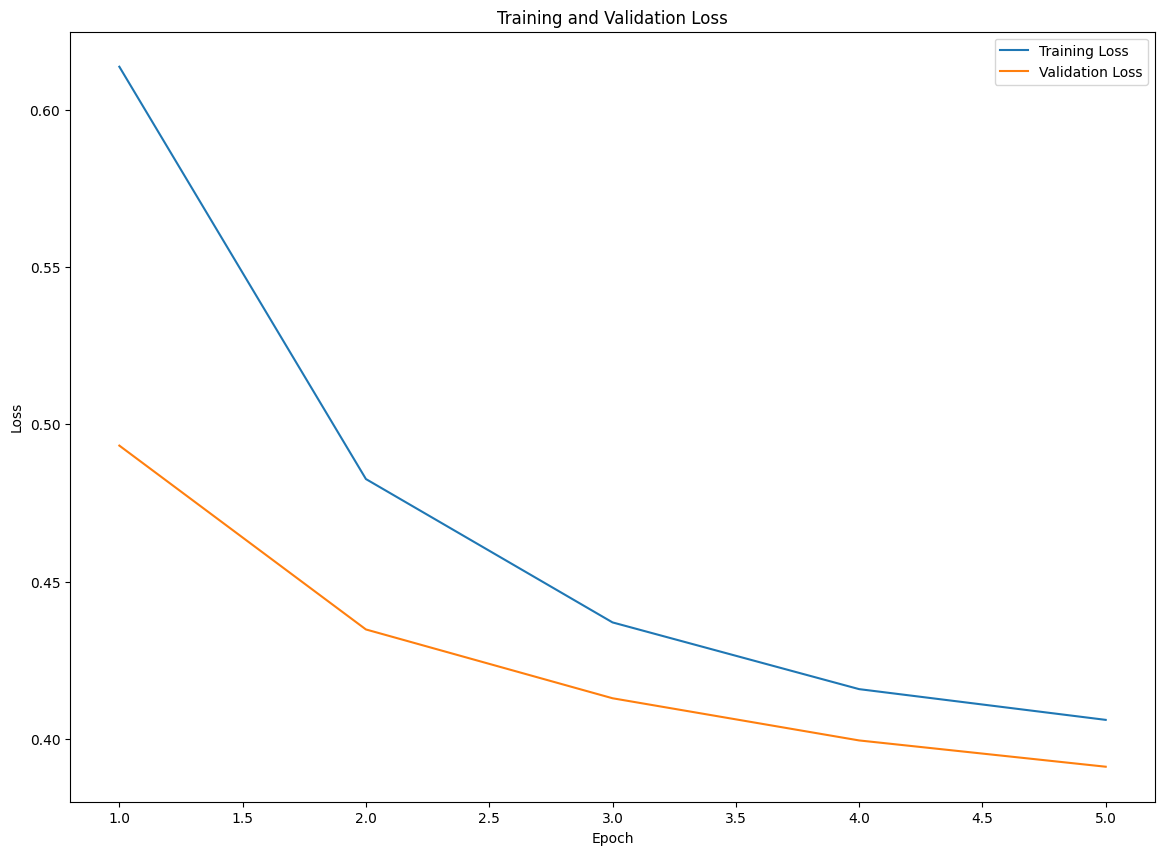

In [ ]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
np.argmin(val_loss)

4

In [ ]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 5ms/step - loss: 0.4068 - auc: 0.8455


[0.40677425265312195, 0.8455347418785095]